In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display

## Gradient descent in 2D

In [2]:
# the 'peaks' function
def peaks(x, y):
  # expand to a 2D mesh
  x, y = np.meshgrid(x, y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)

  return z

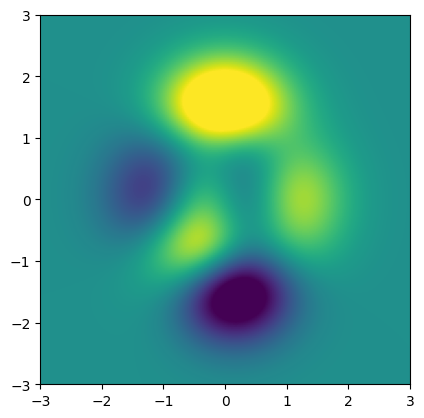

In [4]:
# create the landscape
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [6]:
# Create derivative functions using sympy

sx, sy = sym.symbols('sx, sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2 - sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

df_x(1, 1).evalf()

-1.07369833656079

In [10]:
# random starting point (uniform between -2 and 2)
localmin = np.random.rand(2) * 4 - 2
startpnt = localmin[:]

learning_rate = 0.01
training_epochs = 1000

# run training
trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
  grad = np.array([df_x(localmin[0], localmin[1]).evalf(),
                   df_y(localmin[0], localmin[1]).evalf()])
  localmin = localmin - learning_rate * grad
  trajectory[i,:] = localmin

localmin, startpnt

(array([0.228278920556369, -1.62553495750000], dtype=object),
 array([-0.08012661, -1.9158422 ]))

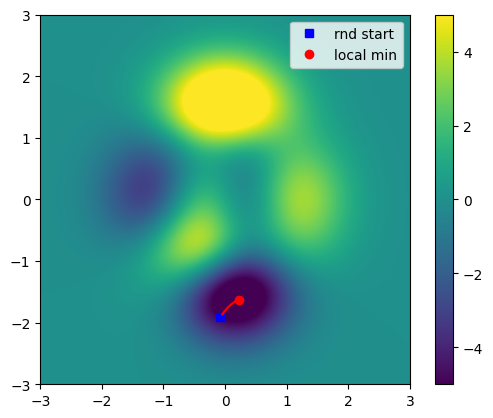

In [11]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

## Gradient ascent code challenge

In [14]:
# random starting point (uniform between -2 and 2)
localmin_asc = np.random.rand(2) * 4 - 2
startpnt_asc = localmin_asc[:]

learning_rate = 0.01
training_epochs = 1000

# run training
trajectory_asc = np.zeros((training_epochs, 2))

for i in range(training_epochs):
  grad = np.array([df_x(localmin_asc[0], localmin_asc[1]).evalf(),
                   df_y(localmin_asc[0], localmin_asc[1]).evalf()])
  localmin_asc = localmin_asc + learning_rate * grad
  trajectory_asc[i,:] = localmin_asc

localmin_asc, startpnt_asc

(array([-0.460024518034387, -0.629196508716801], dtype=object),
 array([-1.5550573 , -0.96469092]))

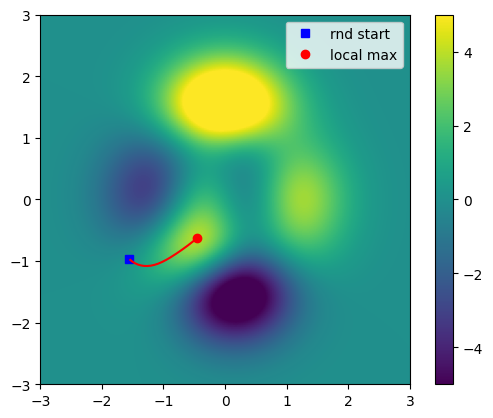

In [15]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt_asc[0], startpnt_asc[1], 'bs')
plt.plot(localmin_asc[0], localmin_asc[1], 'ro')
plt.plot(trajectory_asc[:, 0], trajectory_asc[:, 1], 'r')
plt.legend(['rnd start', 'local max'])
plt.colorbar()
plt.show()